In [6]:
# description = "blue haired female yoga instructor focused on wellness content creation"
# description = "a car enthusiast who loves to travel and explore new places"
description = "a digital nomad who loves to travel and explore new places, works in finance and loves to cook"

# ollama <> phi3

In [7]:
from langchain_community.llms import Ollama
from langchain_core.output_parsers import JsonOutputParser
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob
import json
import requests

prompt = """
"system": "you are a highly skilled copywriter for a social media profiles like instagram, you will be given a {description} of a person and you will need to write:

1. a creative instagram post IDEA / CONCEPT
2. then you will write a DALL-E prompt to generate image for that post
3. then you will write a caption with 25 hashtags for this post

the response should be a JSON file with ['idea','prompt', 'caption'] as keys and corresponding output as values"
"""
prompt += f"""\n"user": "description: {description}" """

model = Ollama(model="phi3")
parser = JsonOutputParser()
chain = model | parser

out = chain.invoke(prompt)

# run draw things api here

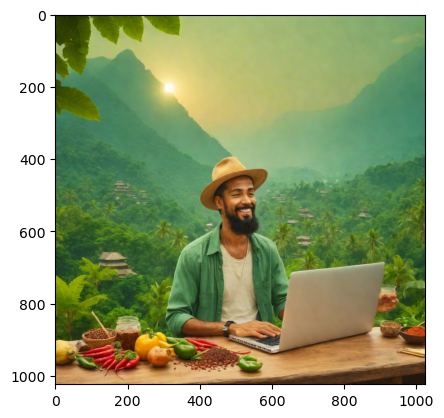

In [8]:
# Define the API endpoint URL
url = "http://localhost:7860/sdapi/v1/txt2img"

payload = {"prompt": out["prompt"]}
# payload = {"prompt": out["prompt"], "max_images": 1}

# Send the GET request
response = requests.post(url, json=payload)

def get_latest_file():
    os.chdir("/Users/mikolaj/Projects/stable_diff")
    list_of_files = glob.glob('*.png') # * means all if need specific format then *.csv
    latest_file = max(list_of_files, key=os.path.getctime)
    return latest_file

def show_image():
    img = Image.open(get_latest_file())
    plt.imshow(img)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Print the response content (JSON in this example)
    # print(response.json())
    show_image()
else:
    # Print an error message if the request was unsuccessful
    print(f"Error: {response.status_code}")

In [9]:
out["caption"]

"🌏🌍✈️ Embracing the life of a digital nomad in every corner of our beautiful world! From scaling peaks to unearthing ruins, there's always something new to discover. 🧾📈 Balancing finance with flavor-filled adventures! #DigitalNomadLife #TravelWanderlust #GlobalExplorer #FinancialFreedom #RemoteWorkLifestyle #BirdOfAFeatherTalks #StayCuriousAndWandering #UntamedSpaces #CulinaryAdventures #CookingOnTheGo #HappyNomadLife #VoyageForSuccess #PeakPerformanceWithPlaces #ExploringFinance #FoodieJourneys #BringingPassionsTogether #InspiringPaths #NewPerspectivesEveryday #TravelSmartWorkSmarter #WanderlustAndWealth #CulturalGems #BeautifulDestinations #ExcitingRoutes #LifestyleGoals #FollowYourDreams #CookingAdventures #FinanceInspirations #LifeOfAnAlohaNomad #FreedomToTravel #WorldlyWanderer #MakingMemoriesOnTheMove #BeastOfBali #EpicureanExplorers"

# run notion api here

In [10]:
# todo